                          NO3       NH4       PO4      chlo       SDeN  \
                     west_sur  west_sur  west_sur  west_sur   west_sur   
date                                                                     
2015-02-02 12:00:00  1.999572  0.977234  0.249793  2.439474   8.843970   
2015-02-17 12:00:00  3.927730  0.612114  0.262902  1.700000   7.804450   
2015-05-03 12:00:00  1.428265  1.386258  0.182322  2.744118  12.959408   
2015-05-18 12:00:00  0.785546  0.856959  0.142059  1.310000  11.783189   
2015-08-01 12:00:00  1.529084  1.134211  0.357047  1.252941  10.401133   
2015-08-16 12:00:00  2.949584  0.930537  0.413850  1.703030  10.056287   
2015-08-31 12:00:00  5.641648  0.714133  0.581151  0.500000   9.355138   
2015-09-30 12:00:00  3.600419  1.041444  0.571735  3.083333   8.331548   
2015-10-15 12:00:00  4.303311  1.005076  0.613438  2.133333  10.428982   

                         SDeP      oxygen       NO3       NH4       PO4  \
                     west_sur    wes

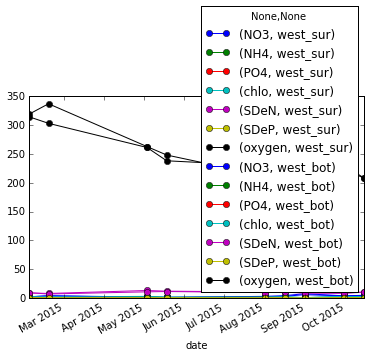

In [1]:
# coding: utf-8

% matplotlib inline

import pandas as pd
import datetime

def csv2csv(infile, outfile):
    #parser = lambda mon, day: datetime.datetime(2012, int(float(mon)), int(float(day)), 12)
    #df = pd.read_csv(infile, date_parser=parser, parse_dates={'date':['mon','day']}, index_col='date')
    df = pd.read_csv(infile, parse_dates={'date':['mon','day']}, index_col='date')
    df = df.sort_index()
    upper = df[df.Lay == 'U']
    lower = df[df.Lay == 'B']
    u_mean = upper.resample('15D', how='mean', loffset=datetime.timedelta(days=-7.5))
    l_mean = lower.resample('15D', how='mean', loffset=datetime.timedelta(days=-7.5))
    u_mean = u_mean.dropna()
    l_mean = l_mean.dropna()
    names = ['NO3','NH4_N','PO4_P','Chl_a','TON','TOP', 'DO']
    names2 = ['NO3','NH4','PO4','chlo','SDeN','SDeP', 'oxygen']
    if 'west' in outfile:
        layers = ['west_sur','west_bot']
    elif 'south' in outfile:
        layers = ['south_sur','south_bot']
    else:
        layers = ['_sur','_bot']
    #bio = pd.concat([u_mean[names], l_mean[names]], axis=1, keys=layers)
    bio = pd.concat([u_mean[names], l_mean[names]], axis=1)
    bio.columns = pd.MultiIndex.from_product([layers,names2])
    bio = bio.swaplevel(0, 1, axis=1)
    bio.plot(style='o-')

    print bio
    bio.to_csv(outfile, date_format='2012/%m/%d %H:%M')
    
infile = 'Z:/Data/Database/SETO_KB2.csv'
outfile = 'Y:/share/boundary/bio_west_seto_2001-2013_15D_raw.csv'
csv2csv(infile, outfile)

                          NO3       NH4       PO4      chlo       SDeN  \
                    south_sur south_sur south_sur south_sur  south_sur   
date                                                                     
2015-01-24 12:00:00  4.356209  2.231665  0.504472  1.487500  11.890309   
2015-02-08 12:00:00  3.242162  1.666310  0.450930  1.220000   7.565046   
2015-02-23 12:00:00  3.419902  0.952177  0.355148  0.444444   6.419259   
2015-04-24 12:00:00  3.116215  3.181137  0.261225  0.527273   7.530854   
2015-05-09 12:00:00  1.228308  1.642505  0.194793  1.263333   8.055417   
2015-05-24 12:00:00  0.867161  0.612114  0.156819  0.471429   9.538772   
2015-08-07 12:00:00  2.135010  2.733404  0.326202  1.668966  21.702246   
2015-08-22 12:00:00  1.541336  1.368754  0.290576  1.291667  11.372563   
2015-09-06 12:00:00  2.356638  0.510095  0.387434  1.457143   5.396803   
2015-10-06 12:00:00  3.030486  1.391643  0.470219  1.241026   8.212526   
2015-10-21 12:00:00  3.082673  2.20190

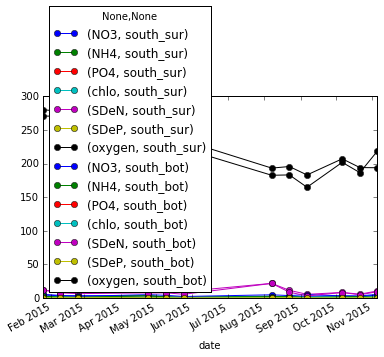

In [2]:
infile = 'Z:/Data/Database/SETO_WY2.csv'
outfile = 'Y:/share/boundary/bio_south_seto_2001-2013_15D_raw.csv'
csv2csv(infile, outfile)